可视化Loss曲线

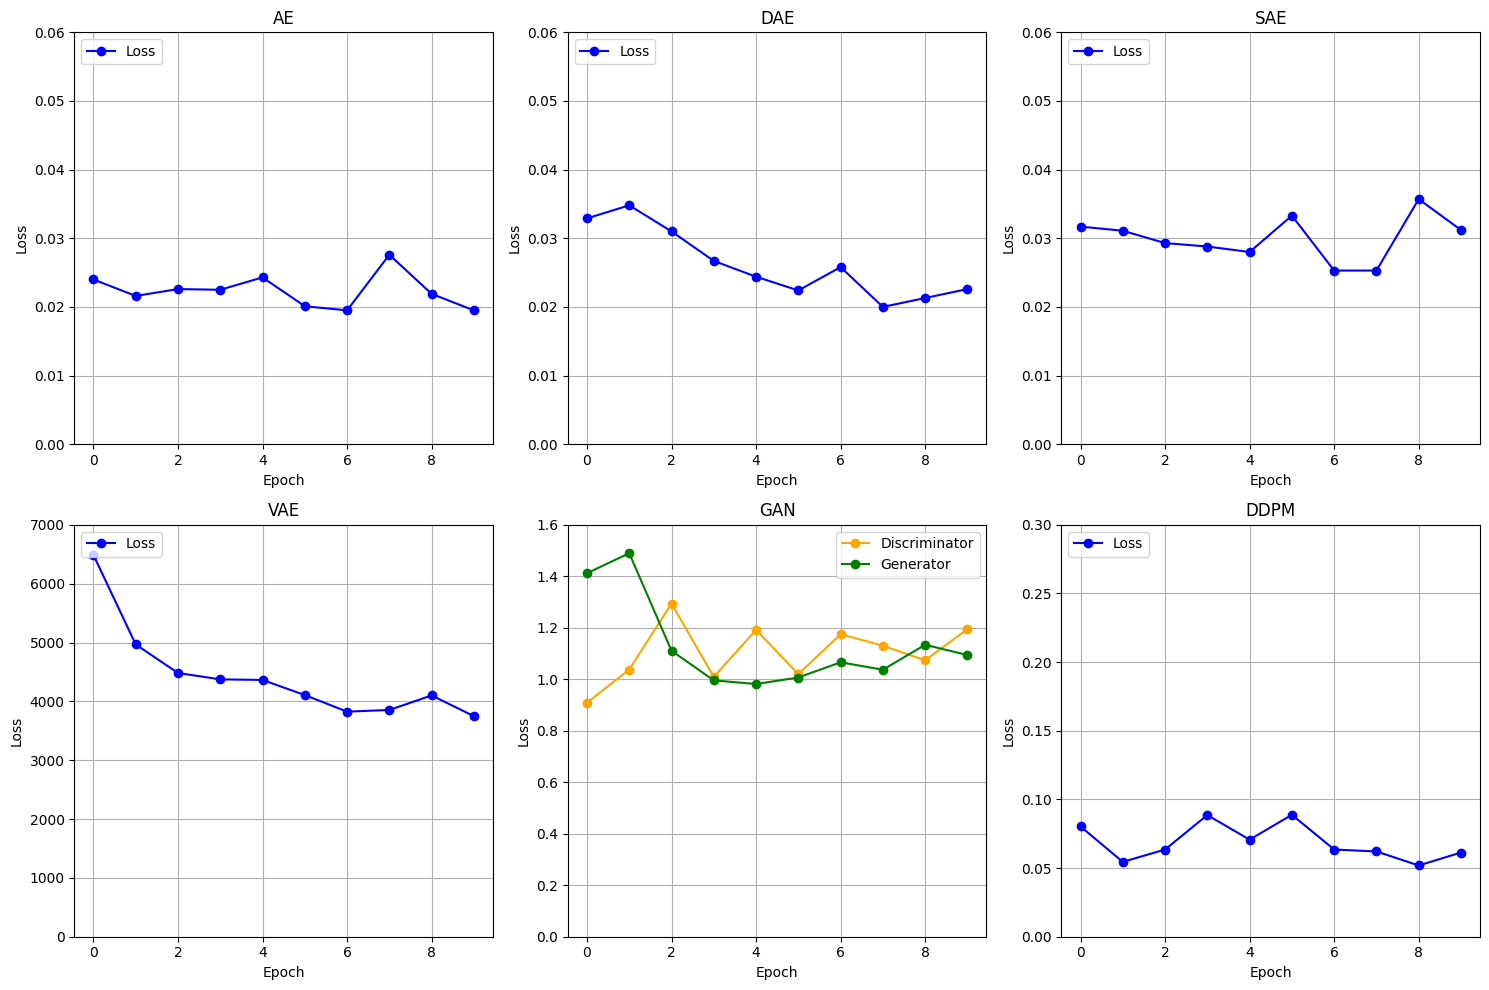

In [ ]:
import matplotlib.pyplot as plt
losses = {
    "AE": [0.0240, 0.0216, 0.0226, 0.0225, 0.0243, 0.0201, 0.0195, 0.0276, 0.0219, 0.0195],
    "DAE": [0.0329, 0.0348, 0.0310, 0.0267, 0.0244, 0.0224, 0.0258, 0.0200, 0.0213, 0.0226],
    "SAE": [0.0317, 0.0311, 0.0293, 0.0288, 0.0280, 0.0333, 0.0253, 0.0253, 0.0357, 0.0312],
    "VAE": [6488.1436, 4967.7622, 4481.7422, 4373.8521, 4363.7744, 4107.1274, 3825.1487, 3853.5615, 4100.5312, 3748.1553],
    "GAN": {
        "D": [0.9088, 1.0380, 1.2941, 1.0094, 1.1921, 1.0200, 1.1750, 1.1305, 1.0737, 1.1949],
        "G": [1.4121, 1.4897, 1.1108, 0.9958, 0.9817, 1.0069, 1.0660, 1.0371, 1.1340, 1.0941]
    },
    "DDPM": [0.0803, 0.0545, 0.0635, 0.0886, 0.0707, 0.0888, 0.0635, 0.0621, 0.0519, 0.0613]
}
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

y_limits = {
    "AE": (0, 0.06),
    "DAE": (0, 0.06),
    "SAE": (0, 0.06),
    "VAE": (0, 7000),
    "GAN": (0, 1.6),
    "DDPM": (0., 0.3)
}

for i, (key, val) in enumerate(losses.items()):
    if key == "GAN":
        axes[i].plot(val['D'], label='Discriminator', marker='o', color='orange')
        axes[i].plot(val['G'], label='Generator', marker='o', color='green')
    else:
        axes[i].plot(val, label='Loss', marker='o', color='blue')

    axes[i].set_title(key)
    axes[i].set_xlabel('Epoch')
    axes[i].set_ylabel('Loss')
    axes[i].set_ylim(y_limits[key])
    axes[i].grid(True)
    axes[i].legend(loc='upper right' if key == 'GAN' else 'upper left')

plt.tight_layout()
plt.show()


可视化训练时间和峰值内存

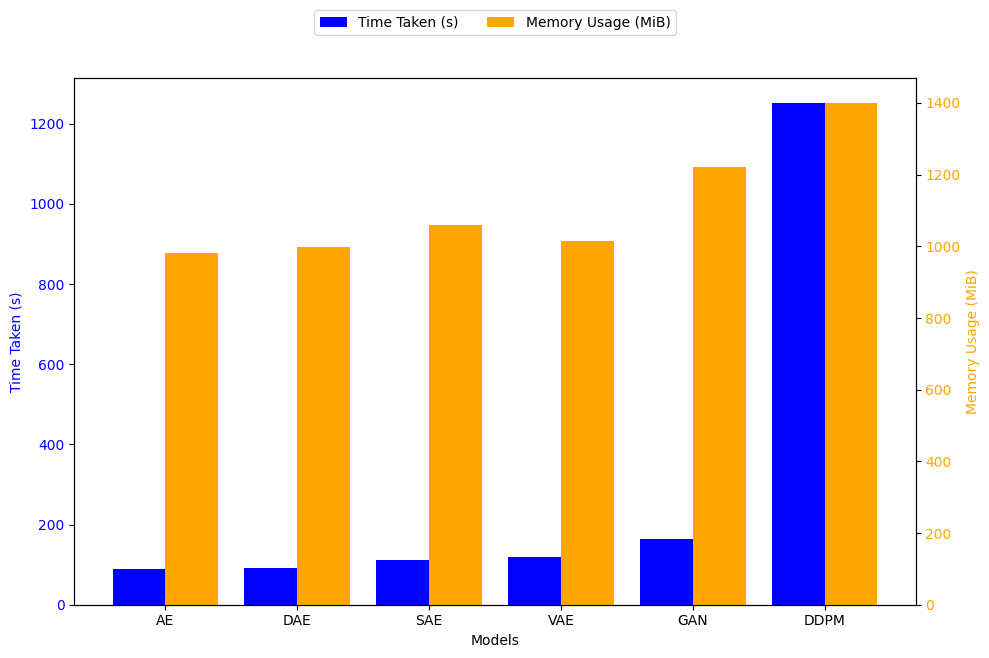

In [ ]:

import numpy as np

models = ['AE', 'DAE', 'SAE', 'VAE', 'GAN', 'DDPM']
time_taken = [89.539, 90.757, 110.801, 117.91, 164.548, 1251.084]  # in seconds
memory_usage = [981.68, 997.62, 1060.08, 1015.43, 1220.72, 1399.59]  # in MiB

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.bar(np.arange(len(models)) - 0.2, time_taken, 0.4, label='Time Taken (s)', color='blue')
ax1.set_xlabel('Models')
ax1.set_ylabel('Time Taken (s)', color='blue')
ax1.set_xticks(np.arange(len(models)))
ax1.set_xticklabels(models)
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.bar(np.arange(len(models)) + 0.2, memory_usage, 0.4, label='Memory Usage (MiB)', color='orange')
ax2.set_ylabel('Memory Usage (MiB)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=2)

plt.tight_layout()

plt.show()


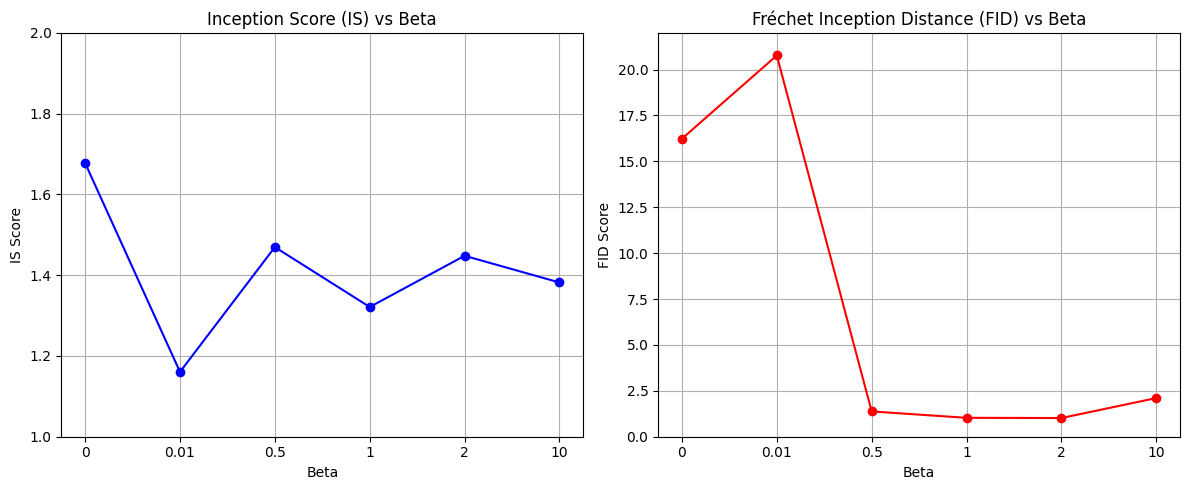

In [ ]:
import matplotlib.pyplot as plt

betas = [0, 0.01, 0.5, 1, 2, 10]

IS_scores = [1.6775, 1.1605, 1.4695, 1.3212, 1.4480, 1.3819]
FID_scores = [16.2318, 20.7682, 1.3780, 1.0292, 1.0178, 2.106]

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(IS_scores, marker='o', linestyle='-', color='b')
plt.title('Inception Score (IS) vs Beta')
plt.xlabel('Beta')
plt.ylabel('IS Score')
plt.ylim(1, 2)
plt.xticks(range(len(betas)), betas)
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(FID_scores, marker='o', linestyle='-', color='r')
plt.title('Fréchet Inception Distance (FID) vs Beta')
plt.xlabel('Beta')
plt.ylabel('FID Score')
plt.ylim(0, 22)
plt.xticks(range(len(betas)), betas)
plt.grid(True)

plt.tight_layout()
plt.show()
